**Giang Pham**

Spring 2022

CS 252: Mathematical Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

data = np.genfromtxt("data/mystery_data_1.csv", delimiter = ",")
print("First 10 rows: \n", data[:10,:])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

First 10 rows: 
 [[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_72428/2950955562.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_72428/2950955562.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


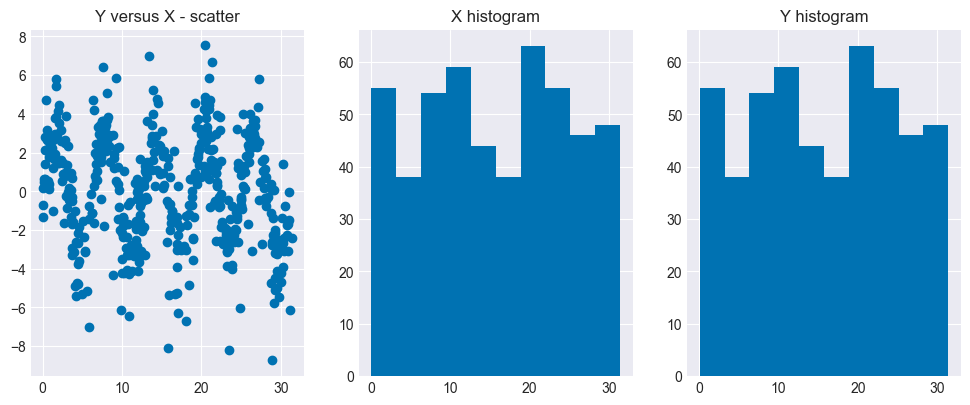

In [6]:
#1b 
fig, ax = plt.subplots(1,3)
x_data = data[:,0]
y_data = data[:,1]
ax[0].scatter(x_data, y_data)
ax[0].set_title("Y versus X - scatter")

ax[1].hist(x_data, bins = 10)
ax[1].set_title("X histogram")

ax[2].hist(x_data, bins = 10)
ax[2].set_title("Y histogram")

plt.show()

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [53]:
import scipy.linalg
#print first 10 lines rows of data
print(data[:10,:])

n = data[:,0].shape[0]
#make data matrix A
x_col = np.reshape(data[:,0], (-1,1))
homog_col = np.ones((n, 1))
x_col_homog = np.hstack((homog_col, x_col))

#make dependent var vector 
y_col = data[:,1]

#calculate least squares solution and residues
result = scipy.linalg.lstsq(x_col_homog, y_col)
lqs = result[0]
residues = result[1]
print("c: ", lqs, "\n") 
print("residues: ", residues, "\n")

#calculate r2 
y_mean = np.sum(y_col)/n
smd = np.sum(np.square(y_col-y_mean))
r2 = 1- residues/smd
print("r2: ", r2)

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')


[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
c:  [ 0.92884793 -0.05650709] 

residues:  3722.8001542015754 

r2:  0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

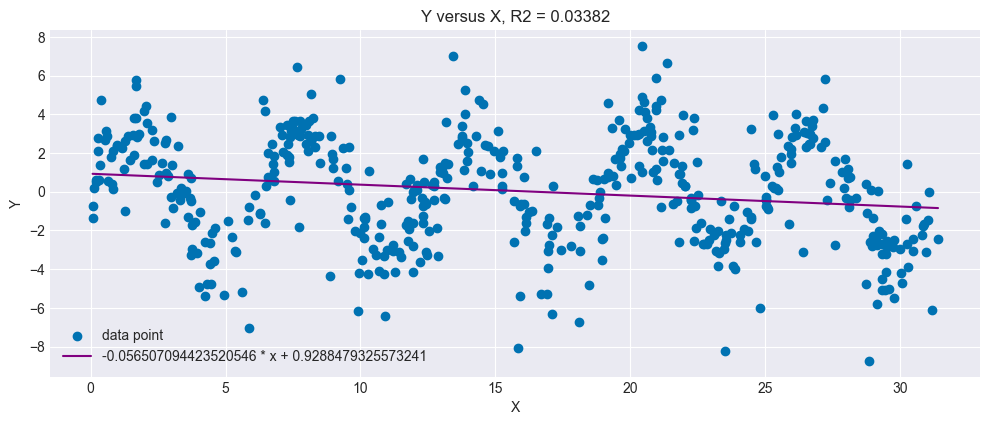

In [77]:
plt.scatter(x_data, y_data)
slope = lqs[1]
intercept = lqs[0]
x_line = np.linspace(start = np.min(x_col), stop = np.max(x_col), num = 100)
y_line = x_line * slope + intercept
plt.plot(x_line, y_line, 'purple')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y versus X, R2 = 0.03382")
plt.legend(labels = ["data point", "{} * x + {}".format(slope, intercept)])
plt.show()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

The linear regression is not a good fit for the data, because the R^2 value is close to 0, meaning there are little correlation between X and Y (as can seen that the graph oscillates up and down), and the regression line can't model that (it is straight line). The residues are also high, which further proves that this model is not a good model for the data. 